In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#To - Do - 1:

In [ ]:
data = pd.read_csv("student.csv")

print("Top 5 rows:")
display(data.head())

print("\nBottom 5 rows:")
display(data.tail())

print("\nDataset Info:")
print(data.info())

print("\nDescriptive Statistics:")
display(data.describe())

# Split features + target
X = data[["Math", "Reading"]].values
Y = data["Writing"].values

print("\nX shape:", X.shape)
print("Y shape:", Y.shape)


Top 5 rows:


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62



Bottom 5 rows:


,Math,Reading,Writing
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78
999,66,66,72



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None

Descriptive Statistics:


,Math,Reading,Writing
count,1000.000000,1000.000000,1000.000000
mean,67.290000,69.872000,68.616000
std,15.085008,14.657027,15.241287
min,13.000000,19.000000,14.000000
25%,58.000000,60.750000,58.000000
50%,68.000000,70.000000,69.500000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000



X shape: (1000, 2)
Y shape: (1000,)


# To - Do - 3:

1. Split the dataset into training and test sets.
2. You can use an 80-20 or 70-30 split, with 80% (or 70%) of the data used for training and the rest
for testing.

In [ ]:
def train_test_split_manual(X, Y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    m = len(Y)
    indices = np.random.permutation(m)
    test_count = int(m * test_size)

    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    return X[train_idx], X[test_idx], Y[train_idx], Y[test_idx]

X_train, X_test, Y_train, Y_test = train_test_split_manual(X, Y)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test :", Y_test.shape)


X_train: (800, 2)
X_test : (200, 2)
Y_train: (800,)
Y_test : (200,)


# To - Do - 4: Building a Cost Function:

In [ ]:
def cost_function(X, Y, W):
    n = len(Y)
    preds = X.dot(W)
    cost = np.sum((preds - Y)**2) / (2 * n)
    return cost


# To - Do - 5: Testing a Cost Function:

In [ ]:
X_test_case = np.array([[1, 2], [3, 4], [5, 6]])
Y_test_case = np.array([3, 7, 11])
W_test_case = np.array([1, 1])

cost_value = cost_function(X_test_case, Y_test_case, W_test_case)
print("\nCost Function Test Output:", cost_value)

if cost_value == 0:
    print("Cost function correct")
else:
    print("Error — check cost function")



Cost Function Test Output: 0.0
Cost function correct


# To - Do - 6: Gradient Descent from Scratch:

In [ ]:
def gradient_descent(X, Y, W_init, alpha, iterations):
    W = W_init.astype(float).copy()
    n = len(Y)
    cost_history = []

    for i in range(iterations):
        Y_pred = X.dot(W)
        loss = Y_pred - Y
        dw = (1/n) * X.T.dot(loss)

        W = W - alpha * dw
        cost = cost_function(X, Y, W)
        cost_history.append(cost)

    return W, cost_history


# To-Do-7: Test Code for Gradient Descent function:

Final parameters: [0.20551667 0.54295081 0.10388027]
First 5 costs: [np.float64(0.10711197094660153), np.float64(0.10634880599939901), np.float64(0.10559826315680616), np.float64(0.10486012948320558), np.float64(0.1041341956428534)]
Last 5 costs : [np.float64(0.05436764093665037), np.float64(0.054364452919908414), np.float64(0.05436127052403898), np.float64(0.05435809373901896), np.float64(0.05435492255484332)]


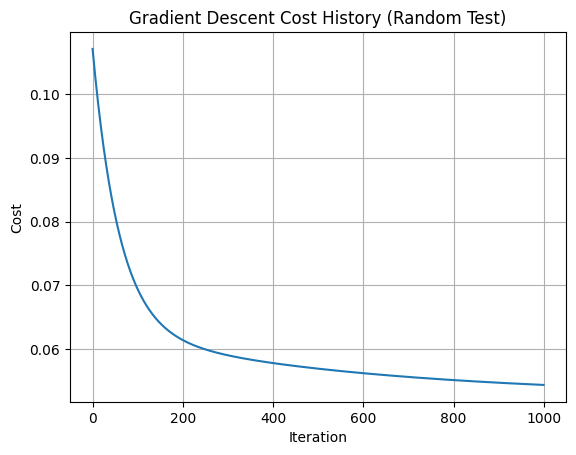

In [ ]:
np.random.seed(0)
X_rand = np.random.rand(100, 3)
Y_rand = np.random.rand(100)
W_rand_init = np.random.rand(3)

alpha_test = 0.01
iters_test = 1000

W_final_rand, cost_hist_rand = gradient_descent(
    X_rand, Y_rand, W_rand_init, alpha_test, iters_test
)

print("Final parameters:", W_final_rand)
print("First 5 costs:", cost_hist_rand[:5])
print("Last 5 costs :", cost_hist_rand[-5:])

plt.plot(cost_hist_rand)
plt.title("Gradient Descent Cost History (Random Test)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


# To- Do- 8: Implementation of RMSE in the Code

In [ ]:
def rmse(Y, Y_pred):
    return np.sqrt(np.mean((Y - Y_pred)**2))


# To- Do- 9-Code for R-Squared

In [ ]:
def r2(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y)**2)
    ss_res = np.sum((Y - Y_pred)**2)
    return 1 - (ss_res / ss_tot)


# To-Do-10:Compiling everything:

In [ ]:
def main():

    X = data[["Math", "Reading"]].values
    Y = data["Writing"].values

    X_train, X_test, Y_train, Y_test = train_test_split_manual(X, Y)

    W_init = np.zeros(X_train.shape[1])
    alpha = 0.00001
    iterations = 1000

    W_opt, cost_history = gradient_descent(X_train, Y_train, W_init, alpha, iterations)

    Y_pred = X_test.dot(W_opt)

    print("Final Weights:", W_opt)
    print("RMSE:", rmse(Y_test, Y_pred))
    print("R²:", r2(Y_test, Y_pred))

    return W_opt, X_train, X_test, Y_train, Y_test

W_opt, X_train, X_test, Y_train, Y_test = main()


Final Weights: [0.34811659 0.64614558]
RMSE: 5.2798239764188635
R²: 0.8886354462786421


# To- Do- 11- finding:

In [ ]:
train_pred = X_train.dot(W_opt)
test_pred  = X_test.dot(W_opt)

print("Train RMSE:", rmse(Y_train, train_pred))
print("Test RMSE :", rmse(Y_test, test_pred))
print("Train R2  :", r2(Y_train, train_pred))
print("Test R2   :", r2(Y_test, test_pred))


Train RMSE: 5.128473455543202
Test RMSE : 5.2798239764188635
Train R2  : 0.8843826546696121
Test R2   : 0.8886354462786421
